# Data Driven Business Strategies using Iowa Spirits Sales

# Exploratory Data Analysis

### Identified Business Problems

As presented in the previous notebook and in the Project proposal, we are using a large dataset to help stakeholders make data-driven business decisions. We identified a few avenues for explorations. 

In this EDA notebook, apart from our general Exploratory FEature Analysis(univariate, bivariate, multivariate) we will also answer 2 Business Problems:

1. We will conduct Exploratory Data Analysis on what was **the impact of Covid-19 on the Alcoholic Beverages Industry**. We will take into consideration the demographic trans and Income per capita, but we will also make our recommendations and analysis considering the “regression to the mean” statistical principle.

2. We will also conduct **Storage Capacity** exploratory analysis with the purpose of predicting how the storage needs will change within one year from the current date.

Later, in our next Notebook we will approach another Business problems that concerns the Alcoholic Beverages Division of Iowa:

3. Cohort Analysis and **Customer Segmentation using RFM(Recency, Frequency and Monetary value) and Unsupervised Learning** in oru Pre-Processing section.

Finally, in our Modeling Part, we will focus on driving Business Insight to help a hypothetical liquor store owner make strategic decisions:

4. We want to assist him in **expanding to new locations** throughout the state.
5. Lastly, we want to use existing data for a **time series analysis and predictions to forecast sales for next month**.

### EDA setup

In the Data Wrangling part of this project we used our initial data and because of the large size we divided our initial data in several subset. Each of them to be used for specific Business problems. These are the datasets created:
* pandemicEDA
* storageEDA
* cust_segmentation
* pick_new_location
* predict_sales
* df - this is the original data, cleaned of missing data, ouliers and checked for consistency

We have this plan to conduct EDA:

   1. Conduct univariate EDA on our data
   2. Conduct bivariate EDA on variables with our target feature
   3. Multivariate EDA
   4. conduct Analysis of how Covid-19 impacted the Spirits Industry in Iowa
   5. conduct Analysis on volume of alcoholic beverages sold within difeerent time periods: weekly, monthly and on a three months period to identify storage needs and trends.

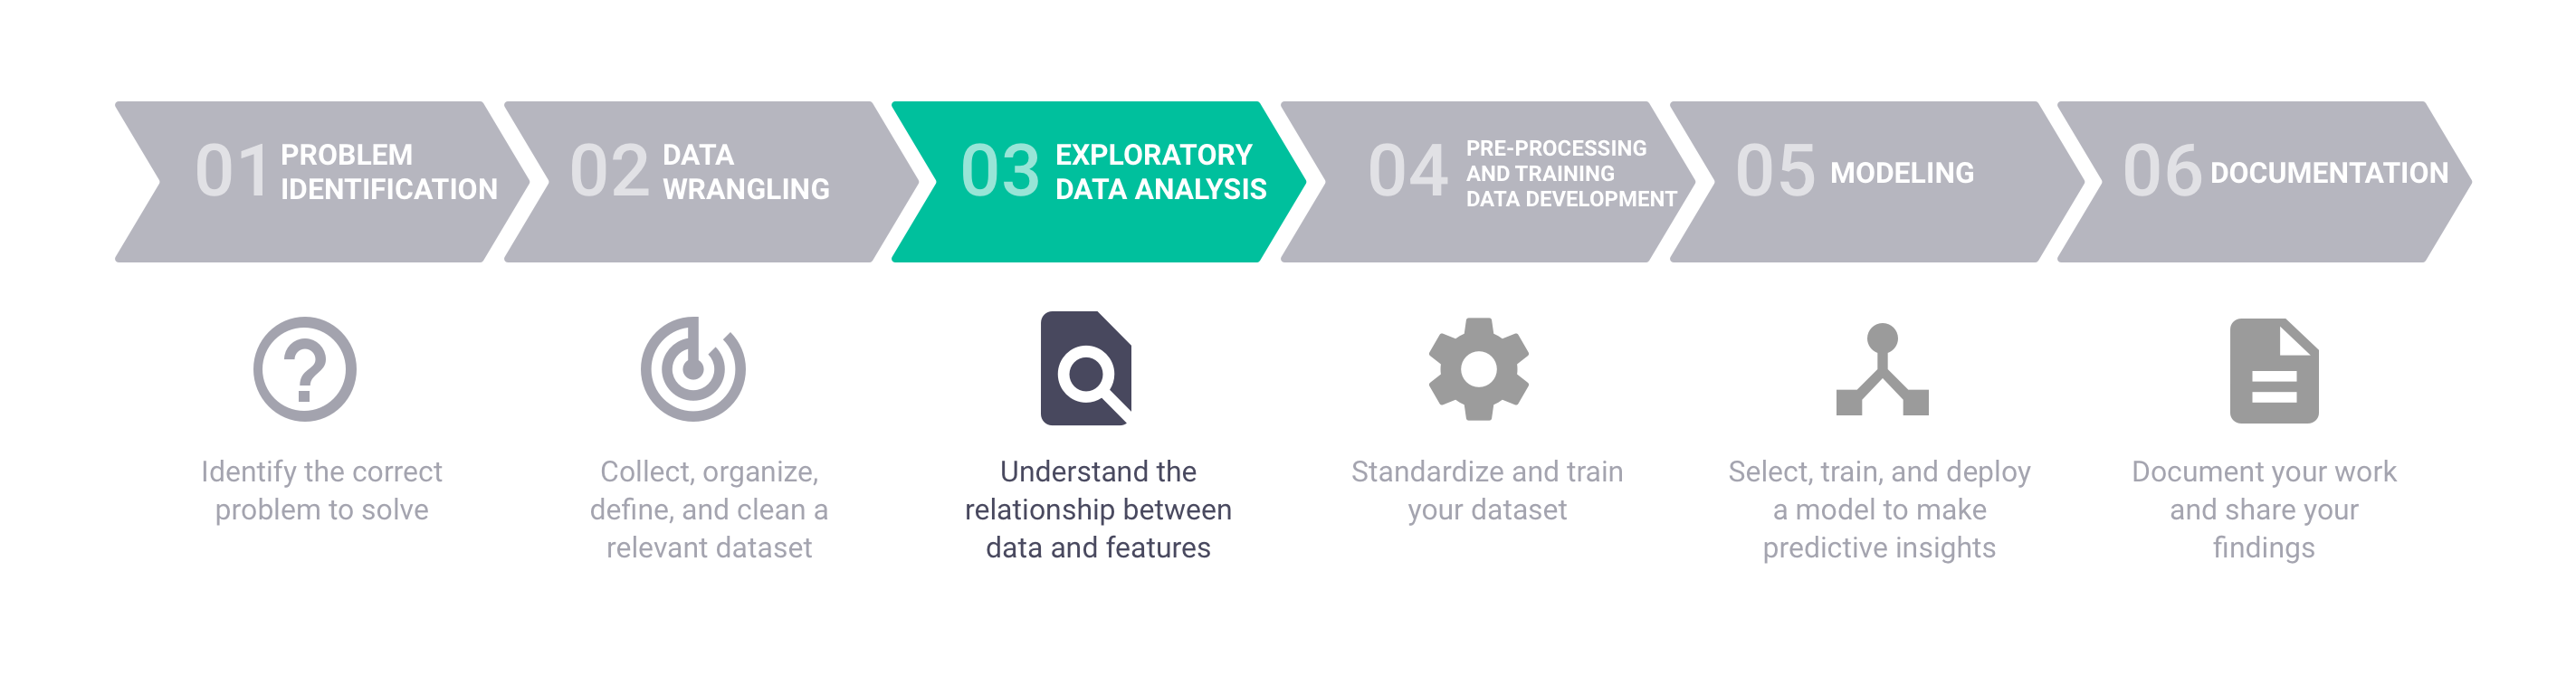

In [10]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 6)
import seaborn as sns
sns.set_theme(style="whitegrid")


## 1. Features Analysis

In [ ]:
df = pd.read_csv('../data/interim/cleaned_data.csv')


In [30]:
df.head().T

,0,1,2,3,4
Unnamed: 0,2414117,2414484,2414605,2414652,2415000
Invoice/Item Number,S31418300050,S31418300056,S31418300004,S31298500073,S31418300032
Date,2016-03-24,2016-03-24,2016-03-24,2016-03-17,2016-03-24
Address,2217 COLLEGE,2217 COLLEGE,2217 COLLEGE,2217 COLLEGE,2217 COLLEGE
City,CEDAR FALLS,CEDAR FALLS,CEDAR FALLS,CEDAR FALLS,CEDAR FALLS
Zip Code,50613,50613,50613,50613,50613
Store Location,POINT (-92.455796 42.517182),POINT (-92.455796 42.517182),POINT (-92.455796 42.517182),POINT (-92.455796 42.517182),POINT (-92.455796 42.517182)
County,black hawk,black hawk,black hawk,black hawk,black hawk
Category,1.0829e+06,1.08139e+06,1.0121e+06,1.0221e+06,1.03108e+06
Category Name,MISC. IMPORTED CORDIALS & LIQUEURS,IMPORTED SCHNAPPS,CANADIAN WHISKIES,TEQUILA,VODKA 80 PROOF


We will drop the features that are not necessary for our EDA.

In [32]:
df = df.drop(['Unnamed: 0','Invoice/Item Number','Address','Category','Item Number'], axis = 1)
df.head().T

,0,1,2,3,4
Date,2016-03-24,2016-03-24,2016-03-24,2016-03-17,2016-03-24
City,CEDAR FALLS,CEDAR FALLS,CEDAR FALLS,CEDAR FALLS,CEDAR FALLS
Zip Code,50613,50613,50613,50613,50613
Store Location,POINT (-92.455796 42.517182),POINT (-92.455796 42.517182),POINT (-92.455796 42.517182),POINT (-92.455796 42.517182),POINT (-92.455796 42.517182)
County,black hawk,black hawk,black hawk,black hawk,black hawk
Category Name,MISC. IMPORTED CORDIALS & LIQUEURS,IMPORTED SCHNAPPS,CANADIAN WHISKIES,TEQUILA,VODKA 80 PROOF
Vendor Name,Diageo Americas,"Sazerac Co., Inc.","Constellation Wine Company, Inc.",Proximo,Sazerac North America
Item Description,Romana Sambuca Italian Liquore,Dr. Mcgillicuddy's Mentholmint,Black Velvet,Jose Cuervo Especial Reposado Tequila,Skol Vodka
Pack,12,12,12,12,12
Bottle Volume (ml),750,750,1000,1000,1000


Lastly, during our preliminary EDA we discovered that some cities are in lower case, while other in upper case. To avoind having the same issue with the remaining data we will transform every object feature from our dataFrame into lowercase.

In [56]:
for columns in ['City', 'Store Location', 'County', 'Category Name', 'Vendor Name', 'Item Description', 'Store Name']:
    df[columns] = df[columns].str.lower()

In [58]:
# Inspect categorical columns
df.describe(exclude=[np.number], datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max
Date,21641145,NaN,NaN,NaN,2016-12-19 17:45:35.215772160,2012-01-03,2014-08-14,2017-01-20,2019-05-22,2021-06-30
City,21641145,459,des moines,1873606,NaT,NaT,NaT,NaT,NaT,NaT
Store Location,21641145,2067,point (-91.53046300000001 41.642764),195881,NaT,NaT,NaT,NaT,NaT,NaT
County,21641145,99,polk,3976377,NaT,NaT,NaT,NaT,NaT,NaT
Category Name,21641145,112,canadian whiskies,2090073,NaT,NaT,NaT,NaT,NaT,NaT
Vendor Name,21641145,491,diageo americas,3631610,NaT,NaT,NaT,NaT,NaT,NaT
Item Description,21641145,9353,black velvet,556925,NaT,NaT,NaT,NaT,NaT,NaT
Store Name,21641145,2495,hy-vee #3 / bdi / des moines,181797,NaT,NaT,NaT,NaT,NaT,NaT


In [34]:
# Inspect numerical columns
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Zip Code,21641145.0,51265.021904,989.089753,50002.00,50316.00,51101.00,52303.00,57222.00
Pack,21641145.0,12.256196,7.693593,1.00,6.00,12.00,12.00,336.00
Bottle Volume (ml),21641145.0,904.075270,653.411025,0.00,750.00,750.00,1000.00,378000.00
State Bottle Cost,21641145.0,10.042841,10.735992,0.00,5.50,8.25,12.34,7680.00
State Bottle Retail,21641145.0,15.077664,16.103339,0.00,8.25,12.38,18.60,11520.00
Bottles Sold,21641145.0,10.442350,28.283905,0.00,3.00,6.00,12.00,15000.00
Sale (Dollars),21641145.0,136.985590,470.601327,0.00,32.28,72.00,141.72,279557.28
Volume Sold (Gallons),21641145.0,2.413350,8.962290,0.00,0.40,1.27,2.77,3962.58
state_profit,21641145.0,45.778322,157.291485,-2901.96,10.80,24.00,47.45,93225.60


In [59]:
df[['Date']] = df[['Date']].apply(pd.to_datetime)
df.dtypes

Date                     datetime64[ns]
City                             object
Zip Code                          int64
Store Location                   object
County                           object
Category Name                    object
Vendor Name                      object
Item Description                 object
Pack                            float64
Bottle Volume (ml)              float64
State Bottle Cost               float64
State Bottle Retail             float64
Bottles Sold                    float64
Sale (Dollars)                  float64
Volume Sold (Gallons)           float64
Store Name                       object
state_profit                    float64
dtype: object

#### City

In [60]:
subset = df.groupby('City').agg({'state_profit':'sum', 'Volume Sold (Gallons)':'sum'})
subset

,state_profit,Volume Sold (Gallons)
City,,
ackley,212617.23,14312.90
adair,166419.36,8352.21
adel,1361564.75,77186.69
afton,119259.25,7088.46
akron,123841.61,7621.23
...,...,...
winthrop,228985.34,13106.88
woodbine,253378.64,15280.97
woodward,102781.09,5704.17


We can see that there are the same cities in different formats

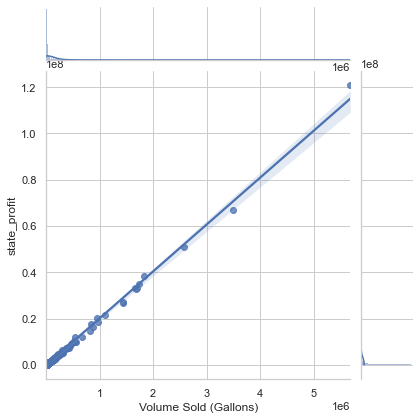

In [61]:
sns.jointplot(data = subset, x = 'Volume Sold (Gallons)', y = 'state_profit', kind = 'reg')

As expected, the volume sold is dirrectly correlated with the state profit. but we can see that while most cities are averaging up to 10,000,000 Gallons, there are a few that are buying up to 70M Gallons.

Let's explore the biggest buyers

In [68]:
top_20 = subset.sort_values('Volume Sold (Gallons)', ascending = False).head(20).round()
top_20


,state_profit,Volume Sold (Gallons)
City,,
des moines,121044719.0,5688560.0
cedar rapids,66682806.0,3491570.0
davenport,50736455.0,2575573.0
west des moines,38202360.0,1832668.0
waterloo,34991989.0,1744894.0
council bluffs,33149700.0,1697181.0
sioux city,32741190.0,1674534.0
iowa city,33094419.0,1667914.0
ames,26869123.0,1429015.0


In [69]:
top_20 = top_20.reset_index()

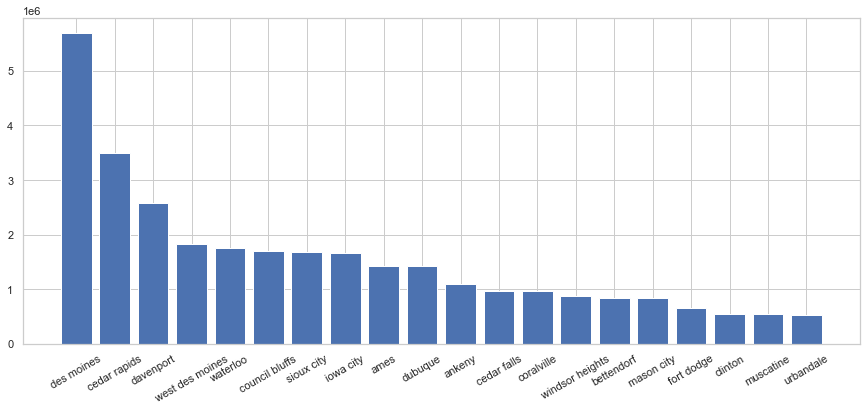

In [83]:
plt.bar(height = top_20['Volume Sold (Gallons)'], x = top_20.City)
plt.xticks(rotation = 30)
plt.show()

### County

We will import some new data for this EDA, more precisely the **annual personal income per county** from [Iowa.Gov](https://data.iowa.gov/Economic-Statistics/Annual-Personal-Income-for-State-of-Iowa-by-County/st2k-2ti2/data). 

In [132]:
income = pd.read_csv('../data/raw/Annual_Personal_Income_for_State_of_Iowa_by_County.csv')
income.head()

,Row ID,Geography ID,Name,Variable Code,Variable,Value,Variable Unit,Date,Location
0,19001_2019_CAINC1-3_annual,19001,"Adair, IA",CAINC1-3,Per capita personal income,55251,Dollars,12/31/2019,POINT (-94.478164 41.328528)
1,19003_2019_CAINC1-3_annual,19003,"Adams, IA",CAINC1-3,Per capita personal income,66683,Dollars,12/31/2019,POINT (-94.696906 41.021656)
2,19005_2019_CAINC1-3_annual,19005,"Allamakee, IA",CAINC1-3,Per capita personal income,49945,Dollars,12/31/2019,POINT (-91.382751 43.274964)
3,19007_2019_CAINC1-3_annual,19007,"Appanoose, IA",CAINC1-3,Per capita personal income,40000,Dollars,12/31/2019,POINT (-92.873061 40.744296)
4,19009_2019_CAINC1-3_annual,19009,"Audubon, IA",CAINC1-3,Per capita personal income,58359,Dollars,12/31/2019,POINT (-94.904312 41.679178)


In [133]:
income['County'] = income['Name'].str[:-4]
income['County'] = income['County'].str.lower()
income.head()

,Row ID,Geography ID,Name,Variable Code,Variable,Value,Variable Unit,Date,Location,County
0,19001_2019_CAINC1-3_annual,19001,"Adair, IA",CAINC1-3,Per capita personal income,55251,Dollars,12/31/2019,POINT (-94.478164 41.328528),adair
1,19003_2019_CAINC1-3_annual,19003,"Adams, IA",CAINC1-3,Per capita personal income,66683,Dollars,12/31/2019,POINT (-94.696906 41.021656),adams
2,19005_2019_CAINC1-3_annual,19005,"Allamakee, IA",CAINC1-3,Per capita personal income,49945,Dollars,12/31/2019,POINT (-91.382751 43.274964),allamakee
3,19007_2019_CAINC1-3_annual,19007,"Appanoose, IA",CAINC1-3,Per capita personal income,40000,Dollars,12/31/2019,POINT (-92.873061 40.744296),appanoose
4,19009_2019_CAINC1-3_annual,19009,"Audubon, IA",CAINC1-3,Per capita personal income,58359,Dollars,12/31/2019,POINT (-94.904312 41.679178),audubon


In [149]:
income = income[['County', 'Value']]
income

,County,Value
0,adair,55251
1,adams,66683
2,allamakee,49945
3,appanoose,40000
4,audubon,58359
...,...,...
94,winnebago,45793
95,winneshiek,51904
96,woodbury,45132
97,worth,44675


In [150]:
income.dtypes

County    object
Value      int64
dtype: object

Now let's see if the volume bouth per county is correlated with the income per capita.

In [154]:
subset = df.groupby('County').agg({'Volume Sold (Gallons)':'sum', 'State Bottle Retail':'mean'}).round(1)
subset

,Volume Sold (Gallons),State Bottle Retail
County,,
adair,82543.2,13.8
adams,19204.2,15.8
allamakee,173774.1,15.1
appanoose,160313.3,14.9
audubon,37928.6,13.6
...,...,...
winnebago,155597.9,15.1
winneshiek,256839.4,16.1
woodbury,1751674.2,15.1


In [156]:
subset = subset.reset_index()

subset = subset.merge(income, on = 'County')
subset

,County,Volume Sold (Gallons),State Bottle Retail,Value
0,adair,82543.2,13.8,55251
1,adams,19204.2,15.8,66683
2,allamakee,173774.1,15.1,49945
3,appanoose,160313.3,14.9,40000
4,audubon,37928.6,13.6,58359
...,...,...,...,...
94,winnebago,155597.9,15.1,45793
95,winneshiek,256839.4,16.1,51904
96,woodbury,1751674.2,15.1,45132
97,worth,54635.1,14.5,44675


In [160]:
subset.columns = ['County','Volume', 'Avg_price_per_bottle', 'Avg_income']

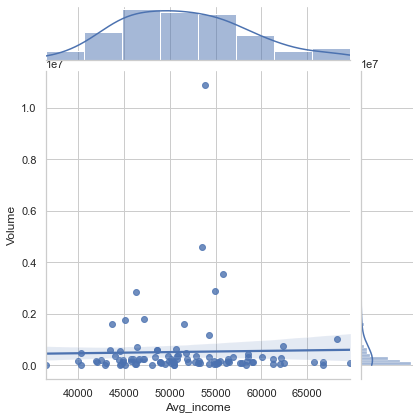

In [161]:
sns.jointplot(data = subset, y = 'Volume', x = 'Avg_income', kind = 'reg')

We can see that there are no correlation between how rich are the residents of a county and how much Volume of Spirits was sold in that county.

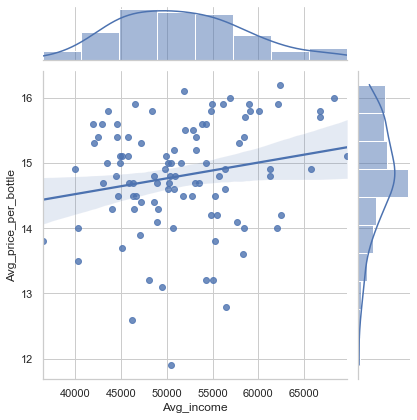

In [162]:
sns.jointplot(data = subset, y = 'Avg_price_per_bottle', x = 'Avg_income', kind = 'reg')

We can see that there is a slight correlation between how wealthy are the residents of a county and the average bottle cost sold in that county.

### Category

In [166]:
subset = df.groupby('Category Name').agg({'State Bottle Retail':'mean', 'Sale (Dollars)':'sum', 'state_profit': 'sum', 'Volume Sold (Gallons)':'sum'}).round(1)

In [168]:
subset.columns = ['Avg_bottle_price', 'total_sales', 'state_profit', 'Volume']
subset = subset.reset_index()
subset

,Category Name,Avg_bottle_price,total_sales,state_profit,Volume
0,100 proof vodka,8.8,7305335.8,2437842.0,253327.4
1,100% agave tequila,28.2,65626061.3,21920287.9,483318.4
2,aged dark rum,19.4,3479460.1,1167293.8,42548.1
3,amaretto - imported,46.7,70470.3,23495.1,299.2
4,american alcohol,13.0,2966946.8,989358.0,45374.3
...,...,...,...,...,...
107,watermelon schnapps,10.5,1705878.7,570297.1,38918.2
108,whiskey liqueur,17.7,146301755.0,48739328.0,2165677.6
109,white creme de cacao,6.8,241671.9,80557.1,6991.4
110,white creme de menthe,7.0,73888.7,24625.1,2097.9


Let's see what are the most expensive and the msot cheap spirits categories

In [193]:
subset = subset.sort_values('Avg_bottle_price', ascending = False)

In [194]:
top15 = subset.head(15)
bottom15 = subset.tail(15)

In [197]:
subs = top15.append(bottom15)
subs

,Category Name,Avg_bottle_price,total_sales,state_profit,Volume
38,delisted / special order items,27.8,333.0,111.0,2.4
1,100% agave tequila,28.2,65626061.3,21920287.9,483318.4
96,straight rye whiskies,28.7,30493502.9,10165774.5,220667.0
71,mezcal,29.6,839529.4,279878.7,5749.9
93,special order items,29.6,8720117.1,2918563.9,186861.1
90,single barrel bourbon whiskies,32.5,3868914.6,1289565.6,24846.5
99,temporary & specialty packages,34.1,3243973.0,1081412.8,31887.9
65,iowa distilleries,34.2,557729.3,185112.8,3207.9
54,imported distilled spirits specialty,35.7,37371.5,12353.6,195.4
66,iowa distillery whiskies,40.9,341602.0,112979.8,1968.2


<AxesSubplot:xlabel='Avg_bottle_price', ylabel='Category Name'>

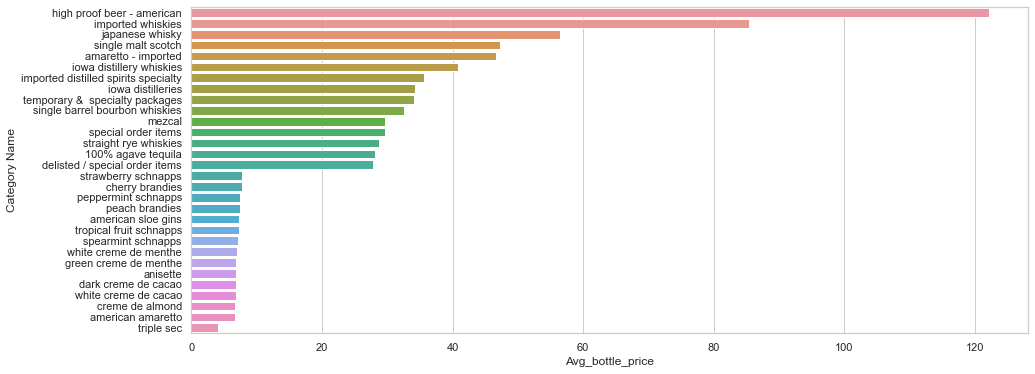

In [204]:
subs = subs.sort_values('Avg_bottle_price', ascending = False)
sns.barplot(data = subs, y = 'Category Name', x = 'Avg_bottle_price')

We can see that the High Proof Beer - American is the most expensive one with an average of over 
$120 per bottle, folowed by imported Wiskey and Japanese Wiskey. The least expensive one is the Triple Sec.

<AxesSubplot:xlabel='Volume', ylabel='Category Name'>

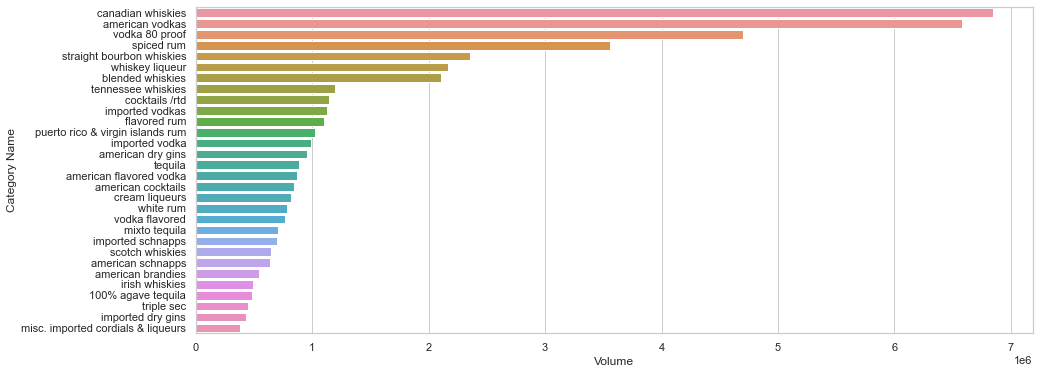

In [218]:
subset = subset.sort_values('Volume', ascending = False)
subs = subset.head(30)
sns.barplot(data = subs, y = 'Category Name', x = 'Volume')

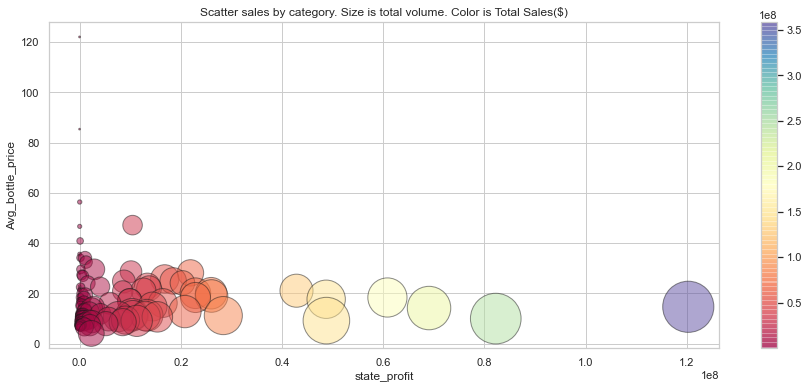

In [216]:
area = subset.Volume**(1/2)
color = subset.total_sales

subset.plot.scatter(x ='state_profit', y ='Avg_bottle_price' ,
                     c = color, colormap=matplotlib.cm.get_cmap('Spectral'),
                     s = area, edgecolors = 'k',
                     sharex=False, figsize = (15,6), alpha = 0.5)
plt.title('Scatter sales by category. Size is total volume. Color is Total Sales($)')
# plt.xscale('log')
plt.show()

We can see here that the main purpose of the Department is to sell as much, and with it, the more profit they will make. All the top 6 categories that are bringing the most profit are below $20 per bottle.

### Item Description EDA

<AxesSubplot:>

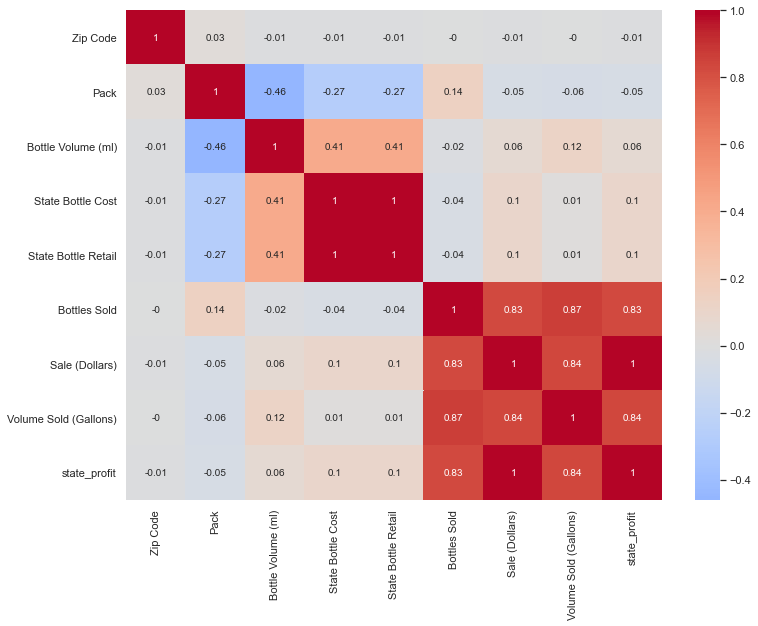

In [220]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(round(df.corr(), 2), center = 0, cmap="coolwarm", annot = True, annot_kws={'size': 10})

In [ ]:
g = sns.pairplot(df)
for axes in g.axes.flat:
    axes.set_ylabel(axes.get_ylabel(), rotation=0, horizontalalignment='right')
    axes.set_xlabel(axes.get_xlabel(), rotation=0)
plt.show()

## The impact of Covid-19 on the Alcoholic Beverages Industry

In [19]:
df = pd.read_csv('../data/interim/pandemicEDA_df.csv')

In [20]:
df

,Unnamed: 0,Date,Store Name,City,County,Vendor Name,Category Name,Item Description,Sale (Dollars),Volume Sold (Gallons),state_profit
0,2414117,2016-03-24,Hillstreet News and Tobacco,CEDAR FALLS,black hawk,Diageo Americas,MISC. IMPORTED CORDIALS & LIQUEURS,Romana Sambuca Italian Liquore,243.00,2.38,81.00
1,2414484,2016-03-24,Hillstreet News and Tobacco,CEDAR FALLS,black hawk,"Sazerac Co., Inc.",IMPORTED SCHNAPPS,Dr. Mcgillicuddy's Mentholmint,156.12,2.38,52.08
2,2414605,2016-03-24,Hillstreet News and Tobacco,CEDAR FALLS,black hawk,"Constellation Wine Company, Inc.",CANADIAN WHISKIES,Black Velvet,477.60,12.68,159.36
3,2414652,2016-03-17,Hillstreet News and Tobacco,CEDAR FALLS,black hawk,Proximo,TEQUILA,Jose Cuervo Especial Reposado Tequila,450.00,6.34,150.00
4,2415000,2016-03-24,Hillstreet News and Tobacco,CEDAR FALLS,black hawk,Sazerac North America,VODKA 80 PROOF,Skol Vodka,79.56,3.17,26.52
...,...,...,...,...,...,...,...,...,...,...,...
21641140,4647896,2017-11-17,"Cats Eye Distillery, LLC",Bettendorf,scott,Cats Eye Distillery,Corn Whiskies,Essence of Iowa Whiskey,346.56,0.19,9.63
21641141,4622234,2018-05-23,"Green Frog Distillery, LLC",Keokuk,lee,"Green Frog Distillery, LLC",Corn Whiskies,Green Frog Distillery Straight Corn Whiskey,157.50,0.39,17.50
21641142,4610127,2018-07-26,Templeton Distilling LLC,Templeton,carroll,Templeton Distilling LLC,Blended Whiskies,Templeton Rye Special Reserve 8YR,246.72,9.70,671.79
21641143,2275966,2020-10-15,Rock River Distillation Company,Rock Rapids,lyon,Rocky Top Investments / Rock River Distillation,Temporary & Specialty Packages,Revenant Rye,1620.00,7.13,540.00


We will drop the first unnecesary column that originates from the former index.

In [21]:
df = df.iloc[: , 1:]

In [23]:
# Inspect categorical columns
df.describe(exclude=[np.number]).T

,count,unique,top,freq
Date,21641145,2345,2020-12-22,18002
Store Name,21641145,2506,Hy-Vee #3 / BDI / Des Moines,181797
City,21641145,842,Des Moines,1062521
County,21641145,99,polk,3976377
Vendor Name,21641145,528,Jim Beam Brands,2036406
Category Name,21641145,135,American Vodkas,1747627
Item Description,21641145,9497,Black Velvet,556925


In [25]:

# Inspect numerical columns
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Sale (Dollars),21641145.0,136.985590,470.601327,0.00,32.28,72.00,141.72,279557.28
Volume Sold (Gallons),21641145.0,2.413350,8.962290,0.00,0.40,1.27,2.77,3962.58
state_profit,21641145.0,45.778322,157.291485,-2901.96,10.80,24.00,47.45,93225.60
